# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visual style for plots
sns.set(style="whitegrid")

Function for downcasting, and we will need for optimization

In [3]:
def downcaste_dtype(df):
    previous_memory_consumption = (df.memory_usage().sum()) / 1024**2 
    for col in df.columns:
        col_dtype = df[col].dtypes
        if col_dtype != 'object':
            xmin = df[col].min()
            xmax = df[col].max()
            if str(col_dtype)[0] == 'i': 
                if np.iinfo('int8').min < xmin and np.iinfo('int8').max > xmax:
                    df[col] = df[col].astype('int8')
                elif np.iinfo('int16').min < xmin and np.iinfo('int16').max > xmax:
                    df[col] = df[col].astype('int16')
                elif np.iinfo('int32').min < xmin and np.iinfo('int32').max > xmax:
                    df[col] = df[col].astype('int32')
                elif np.iinfo('int64').min < xmin and np.iinfo('int64').max > xmax:
                    df[col] = df[col].astype('int64')
                    
            elif str(col_dtype)[0] == 'f': 
                if np.finfo('float16').min < xmin and np.finfo('float16').max > xmax:
                    df[col] = df[col].astype('float16')
                elif np.finfo('float32').min < xmin and np.finfo('float32').max > xmax:
                    df[col] = df[col].astype('float32')
                elif np.finfo('float64').min < xmin and np.finfo('float64').max > xmax:
                    df[col] = df[col].astype('float64')
            else:
                pass

    after_memory_consumption = (df.memory_usage().sum()) / 1024**2
    percentage_of_decrease = ((previous_memory_consumption - after_memory_consumption) / previous_memory_consumption) * 100

    print('Memory usage before downcasting: {:.2f} MB'.format(previous_memory_consumption))
    print('After Downcasting the memory usage decreased to: {:.2f} MB'.format(after_memory_consumption))
    print('Memory usage decreased by {:.3f}%'.format(percentage_of_decrease))

    return df

# Load datasets

In [4]:
previous_loan_applications = pd.read_csv('../DataSet/previous_loan_applications.csv')
repayment_history = pd.read_csv('../DataSet/repayment_history.csv')

In [5]:
# optimizing
previous_loan_applications = downcaste_dtype(previous_loan_applications)
repayment_history = downcaste_dtype(repayment_history)

Memory usage before downcasting: 471.48 MB
After Downcasting the memory usage decreased to: 309.01 MB
Memory usage decreased by 34.459%
Memory usage before downcasting: 830.41 MB
After Downcasting the memory usage decreased to: 311.40 MB
Memory usage decreased by 62.500%


# Merging datasets

In [6]:
merged_data = pd.merge(previous_loan_applications, repayment_history, on='sk_id_curr', how='inner')

# Data Cleaning and Preprocessing

In [7]:
# Checking for missing values
missing_values = merged_data.isnull().sum()

# handling of missing values
merged_data['amt_credit'].fillna(merged_data['amt_credit'].median(), inplace=True)
merged_data['amt_instalment'].fillna(merged_data['amt_instalment'].mode()[0], inplace=True)

# Exploratory Data Analysis (EDA)

In [8]:
summary = merged_data.describe()
summary

,sk_id_prev_x,sk_id_curr,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,...,days_last_due,days_termination,nflag_insured_on_approval,sk_id_prev_y,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
count,9.419487e+07,9.419487e+07,7.490045e+07,9.419487e+07,9.419487e+07,4.002005e+07,7.220401e+07,9.419487e+07,9.419487e+07,4.002005e+07,...,5.724658e+07,5.724658e+07,57246582.0,9.419487e+07,94194869.0,9.419487e+07,94194869.0,94178742.0,9.419487e+07,9.417874e+07
mean,1.922983e+06,2.784954e+05,1.671640e+04,1.946405e+05,2.218495e+05,6.128816e+03,2.539431e+05,1.239632e+01,9.957737e-01,NaN,...,6.867329e+04,7.915483e+04,NaN,1.903519e+06,NaN,1.769248e+01,NaN,NaN,1.900171e+04,1.933056e+04
std,5.327991e+05,1.026153e+05,1.522377e+04,3.139018e+05,3.407386e+05,2.040231e+04,3.368963e+05,3.275698e+00,6.487217e-02,0.000000e+00,...,1.438360e+05,1.514922e+05,0.0,5.359821e+05,0.0,2.518296e+01,NaN,NaN,5.599511e+04,6.067019e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.496077e-05,...,-2.889000e+03,-2.874000e+03,0.0,1.000001e+06,0.0,1.000000e+00,-2922.0,-4920.0,0.000000e+00,0.000000e+00
25%,1.460995e+06,1.897560e+05,6.615585e+03,1.795500e+04,2.780550e+04,0.000000e+00,5.535900e+04,1.000000e+01,1.000000e+00,0.000000e+00,...,-1.477000e+03,-1.410000e+03,0.0,1.432105e+06,0.0,4.000000e+00,-1643.0,-1652.0,4.500000e+03,3.719250e+03
50%,1.923815e+06,2.789230e+05,1.162152e+04,7.874550e+04,9.363150e+04,2.250000e+02,1.259955e+05,1.200000e+01,1.000000e+00,3.349304e-03,...,-6.920000e+02,-6.200000e+02,0.0,1.896933e+06,1.0,8.000000e+00,-844.0,-853.0,9.183645e+03,8.884440e+03
75%,2.383961e+06,3.673870e+05,2.217375e+04,2.250000e+05,2.481300e+05,6.903000e+03,2.804795e+05,1.500000e+01,1.000000e+00,1.088867e-01,...,-1.380000e+02,-6.800000e+01,1.0,2.369058e+06,1.0,1.800000e+01,-379.0,-388.0,1.840207e+04,1.765782e+04
max,2.845382e+06,4.562550e+05,4.180582e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000e+00,...,3.652430e+05,3.652430e+05,1.0,2.843499e+06,178.0,2.770000e+02,-1.0,-1.0,3.771488e+06,3.771488e+06


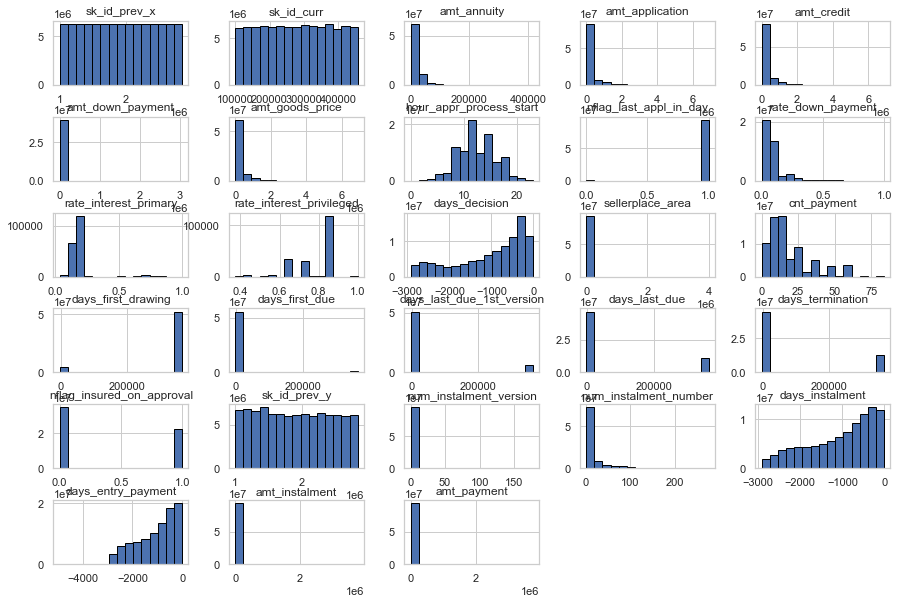

In [9]:
# Distribution of key numerical features
merged_data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.subplots_adjust(hspace=0.5)

c:\Users\ABDERRAHMANE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Loan Amounts')

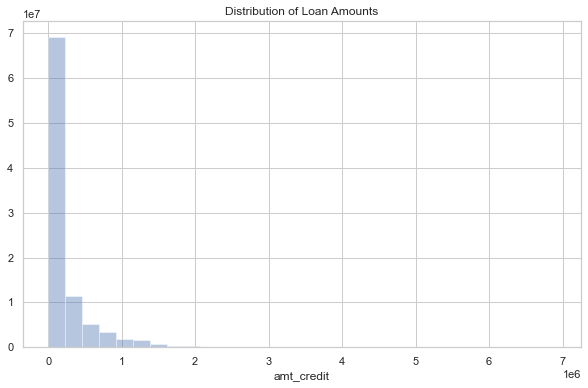

In [10]:
#Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.distplot(merged_data['amt_credit'], bins=30, kde=False)
plt.title('Distribution of Loan Amounts')

In [11]:
merged_data.shape

(94194869, 44)

In [12]:
# # Correlation analysis
# correlation_matrix = merged_data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')

# Aggregation and Grouping

In [13]:
# Average loan amount by contract status
avg_loan_by_status = merged_data.groupby('name_contract_status')['amt_credit'].mean()

# Total payment by loan type
total_payment_by_type = merged_data.groupby('name_contract_type')['amt_payment'].sum()

# Count of loan applications by client
count_loans_by_client = merged_data.groupby('sk_id_curr').size().reset_index(name='loan_count')

# Average loan amount and total payment by contract status
agg_data = merged_data.groupby('name_contract_status').agg({'amt_credit': 'mean', 
                                                           'amt_payment': 'sum'}).reset_index()

# Visualization of Aggregated Data

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Approved'),
  Text(1, 0, 'Canceled'),
  Text(2, 0, 'Refused'),
  Text(3, 0, 'Unused offer')])

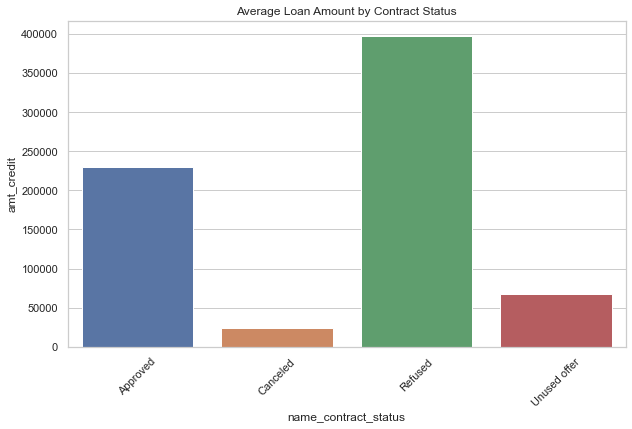

In [14]:
# Bar plot for average loan amount by status
plt.figure(figsize=(10, 6))
sns.barplot(x='name_contract_status', y='amt_credit', data=avg_loan_by_status.reset_index())
plt.title('Average Loan Amount by Contract Status')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Cash loans'),
  Text(1, 0, 'Consumer loans'),
  Text(2, 0, 'Revolving loans'),
  Text(3, 0, 'XNA')])

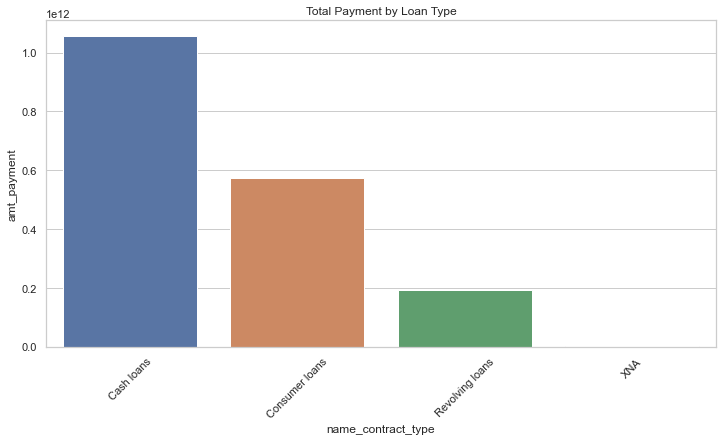

In [15]:
# Bar plot for total payment by loan type
plt.figure(figsize=(12, 6))
sns.barplot(x='name_contract_type', y='amt_payment', data=total_payment_by_type.reset_index())
plt.title('Total Payment by Loan Type')
plt.xticks(rotation=45)

In [16]:
# detecting outliers, using z-score 
merged_data['loan_amount_z_score'] = np.abs(stats.zscore(merged_data['amt_credit']))
outliers = merged_data[merged_data['loan_amount_z_score'] > 3]
outliers

,sk_id_prev_x,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,...,days_termination,nflag_insured_on_approval,sk_id_prev_y,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment,loan_amount_z_score
6,1696966,271877,Consumer loans,68258.656250,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,NaN,NaN,2154916,1.0,1,-512.0,-531.0,12417.389648,12417.389648,4.498672
7,1696966,271877,Consumer loans,68258.656250,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,NaN,NaN,2154916,2.0,5,-392.0,-395.0,74721.687500,74721.687500,4.498672
8,1696966,271877,Consumer loans,68258.656250,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,NaN,NaN,2154916,1.0,3,-452.0,-473.0,12417.389648,12417.389648,4.498672
9,1696966,271877,Consumer loans,68258.656250,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,NaN,NaN,2030495,2.0,1,-42.0,-42.0,17284.275391,17284.275391,4.498672
10,1696966,271877,Consumer loans,68258.656250,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,...,NaN,NaN,2154916,1.0,4,-422.0,-435.0,12417.389648,12417.389648,4.498672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94194333,2541244,302277,Cash loans,61902.585938,1350000.0,1448010.0,NaN,1350000.0,TUESDAY,16,...,-179.0,0.0,2541244,2.0,13,-574.0,-591.0,14266.394531,76168.976562,3.598536
94194334,2541244,302277,Cash loans,61902.585938,1350000.0,1448010.0,NaN,1350000.0,TUESDAY,16,...,-179.0,0.0,2541244,1.0,6,-784.0,-794.0,61902.585938,61902.585938,3.598536
94194335,2541244,302277,Cash loans,61902.585938,1350000.0,1448010.0,NaN,1350000.0,TUESDAY,16,...,-179.0,0.0,2541244,6.0,18,-424.0,-451.0,61902.585938,61902.585938,3.598536
94194336,2541244,302277,Cash loans,61902.585938,1350000.0,1448010.0,NaN,1350000.0,TUESDAY,16,...,-179.0,0.0,2541244,6.0,17,-454.0,-476.0,61902.585938,61902.585938,3.598536
